<a href="https://colab.research.google.com/github/shuoscaryo/python_nn/blob/main/number_guesser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TUTORIAL
https://www.youtube.com/watch?v=Z_ikDlimN6A&ab_channel=DanielBourke

## 0. Add the libraries
  - **torch**: pytorch library
  - **torch.nn**: to access faster loss functions and optimizer
  - **torchvision**: pytorch library for computer vision
  - **torchvision.datasets**: for downloading the images data
  - **torch.utils.data.Dataset**: dataset class for pytorch
  - **torch.utils.data.Dataloader**: Creates iterable object from data


In [1]:
# Import pytorch to create the neural network
import torch
import torch.nn as nn

# Import torchvision to get the data
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting the dataset

Download the data of MNIST numbers- https://pytorch.org/vision/0.16/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST


In [2]:
# Setup training data
train_data = datasets.MNIST(
    root = "data", # Directory in this PC where data will download
    train = True, # Get the training dataset
    download = True, # Download the data?
    transform = ToTensor(), # Convert downloaded data to tensor
    target_transform=None # How to transform the labels/targets
)

# Setup test data
test_data = datasets.MNIST(
    root = "data", # Directory in this PC where data will download
    train = False, # Get the testing dataset
    download = True, # Download the data?
    transform = ToTensor(), # Convert downloaded data to tensor
    target_transform=None # How to transform the labels/targets
)

100%|██████████| 9912422/9912422 [00:00<00:00, 100704888.84it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 53246458.82it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30376156.35it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6614766.93it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image,label = test_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
# Tags of the images
class_names = train_data.classes
print ("class_names:")
print(class_names)

# Tags with index
class_to_idx = train_data.class_to_idx
print("class_to_idx:")
print(class_to_idx)

class_names:
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
class_to_idx:
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


In [6]:
# Check the shape
print(f"Image_shape: {image.shape} -> [color_channels, height, width]")
print(f"Image_label: {class_names[label]}")

Image_shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image_label: 7 - seven


### 1.2 Visualizing the data
The image is shape [1,28,28] and it gives an error to plt. Squeeze removes all the dimensions of size 1, and imshow can handle [28,28] shapes.

(-0.5, 27.5, 27.5, -0.5)

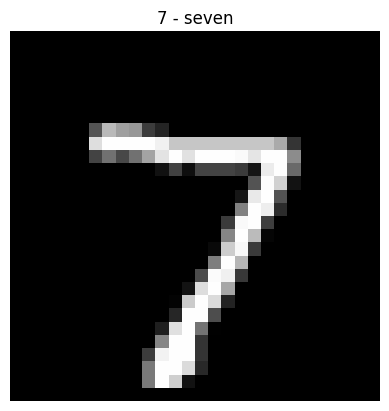

In [7]:
# Plot 1 image
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

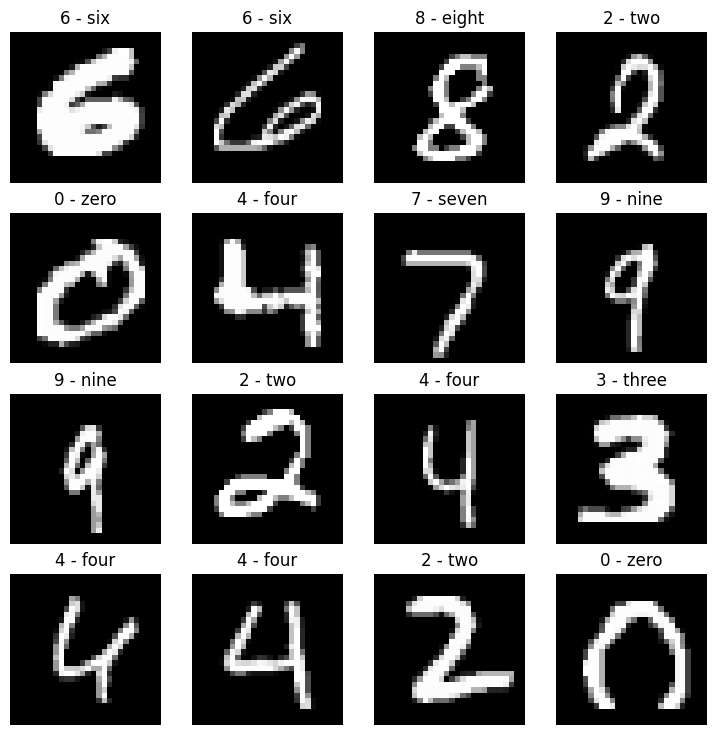

In [8]:
# Plot more images
torch.manual_seed(42) # Set a seed so the random values always are the same
fig = plt.figure(figsize=(9,9)) # Create a new image with size 9x9 inches
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  # Pick a random sample from the dataset, the function returns tensor so it has to be converted
  # to int with item
  random_idx = torch.randint(0, len(train_data), size=[1]).item()

  # Separate image and the label from the sample
  img, label = train_data[random_idx]

  # Generate a grid of 4x4 and each i is where the plot will be printed
  fig.add_subplot(rows,cols,i)

  # Print the image in the plot with black and white
  plt.imshow(img.squeeze(), cmap="gray")

  # Add a title of the label
  plt.title(class_names[label])

  # remove axis
  plt.axis(False)

## 2. Prepare DataLoader
DataLoader turns a dataset into a python iterable.

Turns the data into batches
- A batch allows to train with a sample of the dataset to avoid filling up the memory
- Allows the neural network to update its gradients more time per epoch (iteration)

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
# Load train data with dataloader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True # Mix the data
)

# Load test data with dataloader
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False # No need to shuffle
)

In [10]:
# Check what has been created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d22afdeabc0>, <torch.utils.data.dataloader.DataLoader object at 0x7d22aff5d960>)
length of train_dataloader: 1875 batches of 32
length of train_dataloader: 313 batches of 32


In [11]:
# Check what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


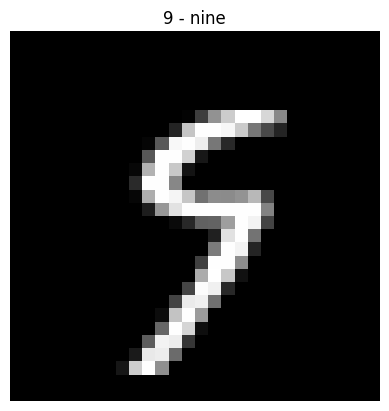

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

### Convert image pixels into inputs for neural network

Use nn.Flatten :D

In [13]:
# Create a flatten layer
flatten_model = nn.Flatten() #flatten is a class

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f"Shape of batch before flatten: {x.shape} -> [color_channels, height, width]")
print(f"Shape of batch after flatten: {output.shape} -> [color_channels, pixels]")

Shape of batch before flatten: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape of batch after flatten: torch.Size([1, 784]) -> [color_channels, pixels]


In [14]:
from torch import nn

# Create the first class model
class MNISTmodelV0(nn.Module):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int
  ):
    super().__init__()

    # Create the neural network variable with 2 layers and linear activation
    # (no ReLu)
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # First squash the image into pixels
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units
        ),
        nn.Linear(
            in_features=hidden_units,
            out_features=output_shape
        )
    )

  # The class needs the forward method overloaded
  def forward(self, X):
    return self.layer_stack(X)

In [15]:
torch.manual_seed(42)

# Setup model with input parameters

model_0 = MNISTmodelV0(
    input_shape = 784,
    hidden_units = 10, # how many neurons per layer
    output_shape = len(class_names) # one for every class
).to("cpu")
model_0

MNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

Model guesses:
0 - zero = 8.99%
1 - one = 9.76%
2 - two = 12.13%
3 - three = 8.13%
4 - four = 11.37%
5 - five = 11.87%
6 - six = 12.55%
7 - seven = 10.45%
8 - eight = 7.75%
9 - nine = 7.00%


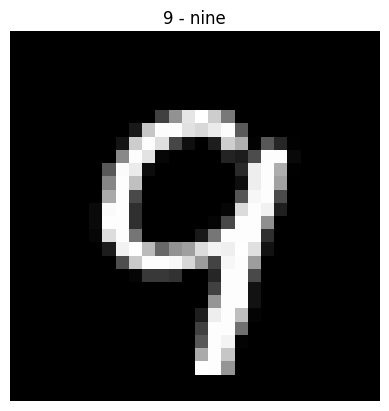

In [16]:
# Guess a number

test_features_batch, test_labels_batch = next(iter(test_dataloader))

random_idx = torch.randint(0, len(test_features_batch), size=[1]).item()
img, label = test_features_batch[random_idx], test_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

img = img.unsqueeze(1)
result = model_0(img)

softmax = nn.Softmax(dim=1)
result = (softmax(result) * 100).squeeze()

print("Model guesses:")
for i in range(0, len(class_names)):
  print(f"{class_names[i]} = {result[i].item():.2f}%")

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - for multi-class data, loss functions are `nn.CrossEntropyLoss()`
* Optimizer - usually stochastic gradiend descent `torch.optim.SGD()`
* Evaluation metric - Accuracy

In [17]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [18]:
# Download helper functions file from tutorial repo
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [19]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

# Setup an optimizer
optimizer = torch.optim.SGD(
  params = model_0.parameters(),
  lr = 0.1 #learning rate
)

## 3.2 Creating a function to time experiments

In [20]:
from timeit import default_timer as timer
def print_train_time(
  start: float,
  end: float,
  device: torch.device = None
):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [21]:
start_time = timer()
end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.1450999987091564e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all

In [22]:
# Import Tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  ### Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optmizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (acumulattively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4051 | Test loss 0.2952, Test acc: 91.6733
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.3084 | Test loss 0.2862, Test acc: 91.9529
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.2960 | Test loss 0.2863, Test acc: 91.8930
Train time on cpu: 37.382 seconds


## 4. Make predictions and get Model 0 results

In [51]:
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device = device):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [24]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'MNISTmodelV0',
 'model_loss': 0.28626734018325806,
 'model_acc': 91.8929712460064}

## 5.Setup device agnostic-code (for using a GPU if there is one)

In [27]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Building a better model with non-linearity

In [32]:
# Create a model with non-linear and linear layers

class MNISTmodelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
  )

  def forward(self, X:torch.Tensor):
    return self.layer_stack(X)


In [34]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = MNISTmodelV1(input_shape = 784, # This is the output of the flatten after our 28*28 image goes in
                       hidden_units=10,
                       output_shape=len(class_names)).to(device) # Send to the GPU if it's available

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [36]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

### 6.2 Functionizing training and evaluation/testing loops

Creating a function for training loop `train_step()` and for testing loop `test_step()`

In [43]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training with model trying to learn on data_loader."""

  train_loss, train_acc = 0,0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> predictions labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optmizer step
    optimizer.step()


  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [44]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""

  test_loss, test_acc = 0,0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager to turn off gradient tracking
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [45]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")

  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model=model_1,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.45602 | Train acc: 86.75%
Test loss: 0.26451 | Test acc: 92.02%
Epoch: 1
----------
Train loss: 0.27126 | Train acc: 92.02%
Test loss: 0.23666 | Test acc: 93.02%
Epoch: 2
----------
Train loss: 0.24012 | Train acc: 92.91%
Test loss: 0.22132 | Test acc: 93.30%
Train time on cuda: 32.509 seconds


In [52]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

{'model_name': 'MNISTmodelV1',
 'model_loss': 0.22132283449172974,
 'model_acc': 93.30071884984025}

In [53]:
model_0_results

{'model_name': 'MNISTmodelV0',
 'model_loss': 0.28626734018325806,
 'model_acc': 91.8929712460064}